# Big homework for Pandas.

Name: Inara Kadyrova

## 0. Import packages here

In [1]:
import numpy as np
import pandas as pd

## 1. Euro 2012 stats


The problems below to be solved using the csv file `Euro_2012_stats.csv`. Assign the dataframe to a variable called `euro12`

In [2]:
euro12 = pd.read_csv('Euro_2012_stats.csv')

#### 1.1 Plot distribution of Goals scored

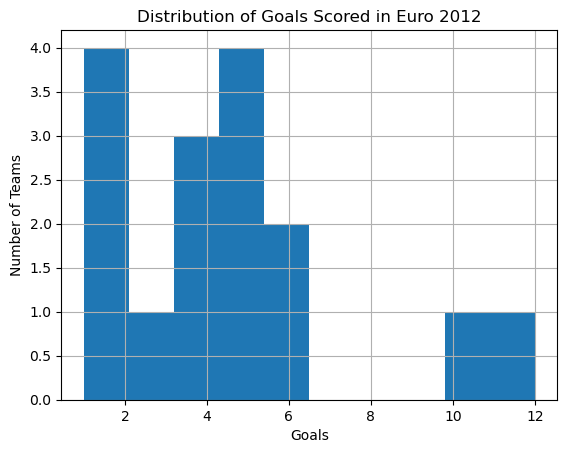

In [5]:
import matplotlib.pyplot as plt

euro12['Goals'].hist(bins=10)
plt.xlabel('Goals')
plt.ylabel('Number of Teams')
plt.title('Distribution of Goals Scored in Euro 2012')

plt.show()

#### 1.2 How many teams particiapted in the Euro 2012?

In [12]:
num_of_teams = euro12['Team'].nunique()

In [10]:
num_of_teams

16

#### 1.3 How many stats were recorded in the dataset?

In [13]:
num_of_stats = len(euro12.columns)

In [14]:
num_of_stats

35

#### 1.4 Show only the columns Team, Yellow Cards and Red Cards and assign them to a dataframe called `discipline`

In [54]:
discipline = euro12[['Team', 'Yellow Cards', 'Red Cards']]

In [55]:
discipline

,Team,Yellow Cards,Red Cards
0,Croatia,9,0
1,Czech Republic,7,0
2,Denmark,4,0
3,England,5,0
4,France,6,0
5,Germany,4,0
6,Greece,9,1
7,Italy,16,0
8,Netherlands,5,0
9,Poland,7,1


#### 1.5 Sort the teams by Red Cards, then by Yellow cards (from highest to lowest)

In [64]:
discipline_sorted = discipline.sort_values(by=['Red Cards', 'Yellow Cards'], ascending=[False, False])

In [65]:
discipline_sorted

,Team,Yellow Cards,Red Cards
6,Greece,9,1
9,Poland,7,1
11,Republic of Ireland,6,1
7,Italy,16,0
10,Portugal,12,0
13,Spain,11,0
0,Croatia,9,0
1,Czech Republic,7,0
14,Sweden,7,0
4,France,6,0


#### 1.6 Calculate the mean Yellow Cards given per Team. Round it to 1 decimal point

In [67]:
yellow_cards_mean = discipline['Yellow Cards'].mean().round(1)

yellow_cards_mean

7.4

#### 1.7 Show teams that scored more than 6 goals

In [68]:
teams_more_than_6_goals = euro12[euro12['Goals'] > 6]

teams_more_than_6_goals

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards,Subs on,Subs off,Players Used
5,Germany,10,32,32,47.8%,15.6%,80,2,1,0,...,10,62.6%,63,49,12,4,0,15,15,17
13,Spain,12,42,33,55.9%,16.0%,100,0,1,0,...,15,93.8%,102,83,19,11,0,17,17,18


#### 1.8 Show teams that start with G

In [70]:
teams_start_with_G = euro12[euro12['Team'].str.startswith('G')]

teams_start_with_G

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards,Subs on,Subs off,Players Used
5,Germany,10,32,32,47.8%,15.6%,80,2,1,0,...,10,62.6%,63,49,12,4,0,15,15,17
6,Greece,5,8,18,30.7%,19.2%,32,1,1,1,...,13,65.1%,67,48,12,9,1,12,12,20


#### 1.9 Present only Shooting Accuracy from Sweden, Spain, Croatia, France, Portugal

In [76]:
chosen_teams = ['Sweden', 'Spain', 'Croatia', 'France', 'Portugal']
shooting_accuracy = euro12[euro12['Team'].isin(chosen_teams)][['Team', 'Shooting Accuracy']]

shooting_accuracy

,Team,Shooting Accuracy
0,Croatia,51.9%
4,France,37.9%
10,Portugal,34.3%
13,Spain,55.9%
14,Sweden,47.2%


#### 1.10 What metric is a good predictor of Goals?*

*Hint: this is what Barcelona fans, coaches, players believe. Real Madrid fans (like me) consider it overrated.  

In [77]:
numeric_data = euro12.select_dtypes(include=[np.number])
correlation_with_goals = numeric_data.corrwith(euro12['Goals'])
correlation_with_goals_sorted = correlation_with_goals.sort_values(ascending=False)

correlation_with_goals_sorted 

Goals                         1.000000
Passes                        0.838497
Touches                       0.837760
Passes completed              0.830062
Shots on target               0.804193
Tackles                       0.796830
Clean Sheets                  0.792559
Penalty goals                 0.730437
Subs on                       0.727830
Subs off                      0.727830
Offsides                      0.703043
Corners Taken                 0.697240
Dribbles                      0.693998
Crosses                       0.667097
Fouls Won                     0.663876
Total shots (inc. Blocked)    0.650109
Fouls Conceded                0.483833
Interceptions                 0.482441
Shots off target              0.403821
Headed goals                  0.349330
Yellow Cards                  0.337709
Clearances                    0.255700
Hit Woodwork                  0.200512
Saves made                    0.143912
Players Used                  0.136067
Penalties not scored     

#### 1.11 What two different metrics are the most correlated?*

*answer however you like, it is a bit complex

In [84]:
correlation_matrix = numeric_data.corr()
np.fill_diagonal(correlation_matrix.values, np.nan)
max_corr_pair = correlation_matrix.unstack().dropna().idxmax()

max_corr_pair

('Subs on', 'Subs off')

## 2. Alcohol consumption

The problems below to be solved using the csv file `global_alcohol_consumption.csv`. Assign the dataframe to a variable called `drinks`

In [85]:
drinks = pd.read_csv('global_alcohol_consumption.csv')

#### 2.1 Which continent drinks more beer on average?

`Answer`: EU

In [89]:
average_beer_consumption = drinks.groupby('continent')['beer_servings'].mean()
highest_beer_consumption_continent = average_beer_consumption.idxmax()

highest_beer_consumption_continent

'EU'

#### 2.2 For each continent print the statistics for wine consumption

In [92]:
wine_consumption_stats = drinks.groupby('continent')['wine_servings'].describe()

wine_consumption_stats

,count,mean,std,min,25%,50%,75%,max
continent,,,,,,,,
AF,53.0,16.264151,38.846419,0.0,1.0,2.0,13.00,233.0
AS,44.0,9.068182,21.667034,0.0,0.0,1.0,8.00,123.0
EU,45.0,142.222222,97.421738,0.0,59.0,128.0,195.00,370.0
OC,16.0,35.625000,64.555790,0.0,1.0,8.5,23.25,212.0
SA,12.0,62.416667,88.620189,1.0,3.0,12.0,98.50,221.0


#### 2.3 Print the min, mean, median, max values of spirit consumption by continent

In [94]:
spirit_consumption_values = drinks.groupby('continent')['spirit_servings'].agg(['min', 'mean', 'median', 'max'])

spirit_consumption_values

,min,mean,median,max
continent,,,,
AF,0,16.339623,3.0,152
AS,0,60.840909,16.0,326
EU,0,132.555556,122.0,373
OC,0,58.437500,37.0,254
SA,25,114.750000,108.5,302


#### 2.4 How many countries are top 10% drinkers of beer? Show only 10 countries with the highest consumption.

Hint: top 25% are defined as those where consumption >= 75% percentile in the dataset. 


`Answer (# countries)`: ?

In [95]:
percentile_90 = drinks['beer_servings'].quantile(0.9)

top_10_percent_countries = drinks[drinks['beer_servings'] >= percentile_90]
top_10_countries = top_10_percent_countries.sort_values(by='beer_servings', ascending=False).head(10)

top_10_countries[['country', 'beer_servings']]

,country,beer_servings
117,Namibia,376
45,Czech Republic,361
62,Gabon,347
65,Germany,346
98,Lithuania,343
135,Poland,343
188,Venezuela,333
81,Ireland,313
129,Palau,306
140,Romania,297


#### 2.5 How many countries are top 10% drinkers measured by pure alcohol? Show only 10 countries with the highest consumption

Hint: top 25% are defined as those where consumption >= 75% percentile in the dataset.


`Answer (# countries)`: ?

In [96]:
percentile_90_alcohol = drinks['total_litres_of_pure_alcohol'].quantile(0.9)

top_10_percent_countries_drinkers = drinks[drinks['total_litres_of_pure_alcohol'] >= percentile_90_alcohol]
top_10_countries_drinkers = top_10_percent_countries_drinkers.sort_values(by='total_litres_of_pure_alcohol', ascending=False).head(10)

top_10_countries_drinkers[['country', 'total_litres_of_pure_alcohol']]

,country,total_litres_of_pure_alcohol
15,Belarus,14.4
98,Lithuania,12.9
3,Andorra,12.4
68,Grenada,11.9
45,Czech Republic,11.8
61,France,11.8
141,Russian Federation,11.5
155,Slovakia,11.4
99,Luxembourg,11.4
81,Ireland,11.4


#### 2.6 Create a dataframe that will contain all countries which are top 10% drinkers in at least in one category (beers, spirits, wine).

Hint: the top 10% drinker is defined by having consumption >=90% percentile. 

The schema of desired table:

| Column name | type |  description |
|----------|----------|----------|
| country    | str     | country name     |
| is_top10_beer   | bool     | Is Top 10% drinker of beer |
| is_top10_wine   | bool     | Is Top 10% drinker of wine |
| is_top10_spirit   | bool     | Is Top 10% drinker of spirit |




<b>Extra questions</b>:
* How many countries? Answer: 52
* What countries are in all 3 categories (if any)? Answer:  -
* What countries are in 2 categories (if any)? Answer: ['Australia',
  'Austria',
  'Belgium',
  'Hungary',
  'Latvia',
  'Lithuania',
  'Poland',
  'Slovenia']

In [100]:
percentile_90_beer = drinks['beer_servings'].quantile(0.9)
percentile_90_spirit = drinks['spirit_servings'].quantile(0.9)
percentile_90_wine = drinks['wine_servings'].quantile(0.9)

drinks['is_top10_beer'] = drinks['beer_servings'] >= percentile_90_beer
drinks['is_top10_spirit'] = drinks['spirit_servings'] >= percentile_90_spirit
drinks['is_top10_wine'] = drinks['wine_servings'] >= percentile_90_wine

top_10_beer_drinkers = drinks.sort_values(by='beer_servings', ascending=False).head(10)
top_10_spirit_drinkers = drinks.sort_values(by='spirit_servings', ascending=False).head(10)
top_10_wine_drinkers = drinks.sort_values(by='wine_servings', ascending=False).head(10)

top_10_percent_drinkers = drinks[drinks[['is_top10_beer', 'is_top10_spirit', 'is_top10_wine']].any(axis=1)]
top_10_percent_drinkers = top_10_percent_drinkers[['country', 'is_top10_beer', 'is_top10_spirit', 'is_top10_wine']]

top_10_percent_drinkers

,country,is_top10_beer,is_top10_spirit,is_top10_wine
3,Andorra,False,False,True
6,Argentina,False,False,True
8,Australia,True,False,True
9,Austria,True,False,True
15,Belarus,False,True,False
16,Belgium,True,False,True
17,Belize,True,False,False
25,Bulgaria,False,True,False
40,Cook Islands,False,True,False
42,Croatia,False,False,True


In [106]:
num_countries = top_10_percent_drinkers.shape[0]


countries_all_3 = top_10_percent_drinkers[
    (top_10_percent_drinkers['is_top10_beer']) & 
    (top_10_percent_drinkers['is_top10_spirit']) & 
    (top_10_percent_drinkers['is_top10_wine'])
]['country'].tolist()


countries_2_categories = top_10_percent_drinkers[
    top_10_percent_drinkers[['is_top10_beer', 'is_top10_spirit', 'is_top10_wine']].sum(axis=1) == 2
]['country'].tolist()

num_countries, countries_all_3, countries_2_categories


(52,
 [],
 ['Australia',
  'Austria',
  'Belgium',
  'Hungary',
  'Latvia',
  'Lithuania',
  'Poland',
  'Slovenia'])

#### 2.7 If only considering spirits, at what place Kazakhstan would be among post-Soviet Union countries?

The first place would occupy country with the highest spirit consumption. 


`Answer`: 88

In [107]:
post_soviet_countries = ['Armenia', 'Azerbaijan', 'Belarus', 'Estonia', 'Georgia', 
    'Kazakhstan', 'Kyrgyzstan', 'Latvia', 'Lithuania', 'Moldova', 
    'Russia', 'Tajikistan', 'Turkmenistan', 'Ukraine', 'Uzbekistan']

post_soviet_drinks = drinks[drinks['country'].isin(post_soviet_countries)]
sorted_spirit_consumption = post_soviet_drinks.sort_values(by='spirit_servings', ascending=False)
kazakhstan_position = sorted_spirit_consumption[sorted_spirit_consumption['country'] == 'Kazakhstan'].index[0] + 1

kazakhstan_position

88

#### 2.8 What column has missing values? Does it somehow change above results? 

Extra bonus point if you can guess why it happened. 

In [108]:
missing_values = drinks.isnull().sum()

columns_with_missing_values = missing_values[missing_values > 0]
columns_with_missing_values

continent    23
dtype: int64

In [109]:
#It might have affected the 2.1 task where continent information was required.

## 3. USA Crimes from 1960 to 2014


The relevant dataset is `US_crime_rates_1960_2014.csv`. Assign the dataframe to a variable called `crime`.


Hint: you can solve the below problems as you wish. However, I suggest to benefit from the special data type dedicated for datetimes: `datetime64[ns]`:

> crime.Year = pd.to_datetime(crime.Year, format='%Y').

If you agree to use it, you will need to check how to use `resample` and `offset aliases`: 
* To learn more about .resample (https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.resample.html)
* To learn more about Offset Aliases (http://pandas.pydata.org/pandas-docs/stable/timeseries.html#offset-aliases)






In [110]:
crime = pd.read_csv('US_crime_rates_1960_2014.csv')

#### 3.1 How many crimes of each type happened per decade in USA?

Ignore column Total and Population. 

In [112]:
decades = (crime['Year']//10)*10
crime['Decade'] = decades

In [114]:
crime_types = crime.columns.drop(['Total', 'Population', 'Year', 'Decade'])
crimes_per_decade = crime.groupby('Decade')[crime_types].sum()

crimes_per_decade

,Violent,Property,Murder,Forcible_Rape,Robbery,Aggravated_assault,Burglary,Larceny_Theft,Vehicle_Theft
Decade,,,,,,,,,
1960,4134930,45160900,106180,236720,1633510,2158520,13321100,26547700,5292100
1970,9607930,91383800,192230,554570,4159020,4702120,28486000,53157800,9739900
1980,14074328,117048900,206439,865639,5383109,7619130,33073494,72040253,11935411
1990,17527048,119053499,211664,998827,5748930,10568963,26750015,77679366,14624418
2000,13968056,100944369,163068,922499,4230366,8652124,21565176,67970291,11412834
2010,6072017,44095950,72867,421059,1749809,3764142,10125170,30401698,3569080


#### 3.2 What decade was the most dangerous to live in the US?

`Answer:` 1990

In [115]:
total_crimes_per_decade = crimes_per_decade.sum(axis=1)
most_dangerous_decade = total_crimes_per_decade.idxmax()

most_dangerous_decade

1990

## 4. Wind in Ireland

The dataset is file `windspeed_in_ireland.csv`. Assign it to a variable called `wind`. It is a dataset containing average windspeeds (unit: knots) at 12 locations in Ireland on that day.  


There is column called `Yr_Mo_Dy`, which is Year-Month-Day of recording. All dates must be in XX century. 

In [116]:
wind = pd.read_csv('windspeed_in_ireland.csv')

#### 4.1 Fix the date Yr_Mo_Dy

In [118]:
wind['Yr_Mo_Dy'] = pd.to_datetime(wind['Yr_Mo_Dy'])
wind['Yr_Mo_Dy'] = wind['Yr_Mo_Dy'].apply(lambda x: x.replace(year=x.year - 100) if x.year > 2000 else x)

#### 4.2 Compute how many values are missing for each location over the entire period

In [119]:
missing_values = wind.isnull().sum()

missing_values

Yr_Mo_Dy    0
RPT         6
VAL         3
ROS         2
KIL         5
SHA         2
BIR         0
DUB         3
CLA         2
MUL         3
CLO         1
BEL         0
MAL         4
dtype: int64

#### 4.3 Calculate the average windspeed in January for each location (across entire period)

In [121]:
wind['Month'] = wind['Yr_Mo_Dy'].dt.month
january_data = wind[wind['Month'] == 1]

january_avg = january_data.mean()

january_avg

Yr_Mo_Dy    1969-07-17 06:40:00
RPT                   14.847325
VAL                    12.91456
ROS                   13.299624
KIL                    7.199498
SHA                   11.667734
BIR                    8.054839
DUB                   11.819355
CLA                    9.512047
MUL                    9.543208
CLO                   10.053566
BEL                    14.55052
MAL                   18.028763
Month                       1.0
dtype: object

#### 4.4 Data integrity: do we have missing dates? Do we have duplicates in dates?

In [125]:
date_range = pd.date_range(start=wind['Yr_Mo_Dy'].min(), end=wind['Yr_Mo_Dy'].max())
missing_dates = date_range.difference(wind['Yr_Mo_Dy'])

duplicate_dates = wind[wind.duplicated(subset=['Yr_Mo_Dy'], keep=False)]['Yr_Mo_Dy'].unique()

missing_dates_count = len(missing_dates)
duplicate_dates_count = len(duplicate_dates)

missing_dates_count
duplicate_dates_count

0

#### 4.5 Calculate weekly and monthly moving average (MA) of windspeed in Dublin (location = DUB).

Method .rolling() might be helpful here: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.rolling.html


You can consider monthly as 4 weeks = 28 days. 

#### 4.6 Plot Dublin actual values and Moving Averages on the same plot. Take only 1970s.

Series to be plotted: actual value, weekly and monthly MAs.

#### 4.7 Categorize wind speed in Dublin as LOW, MEDIUM, HIGH.

Definition of categories: 
* LOW is when windspeed is in the bottom 25% percentile (< P25)
* HIGH is when windspeed is in the top 25% percentile (>= P75)
* MEDIUM is everything else. 


#### 4.8 Are there any particular months where there are more wind with HIGH category in Dublin? What about LOW? MEDIUM?